<a href="https://colab.research.google.com/github/mutai-star/db_demo/blob/master/UpdatedSurveilance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

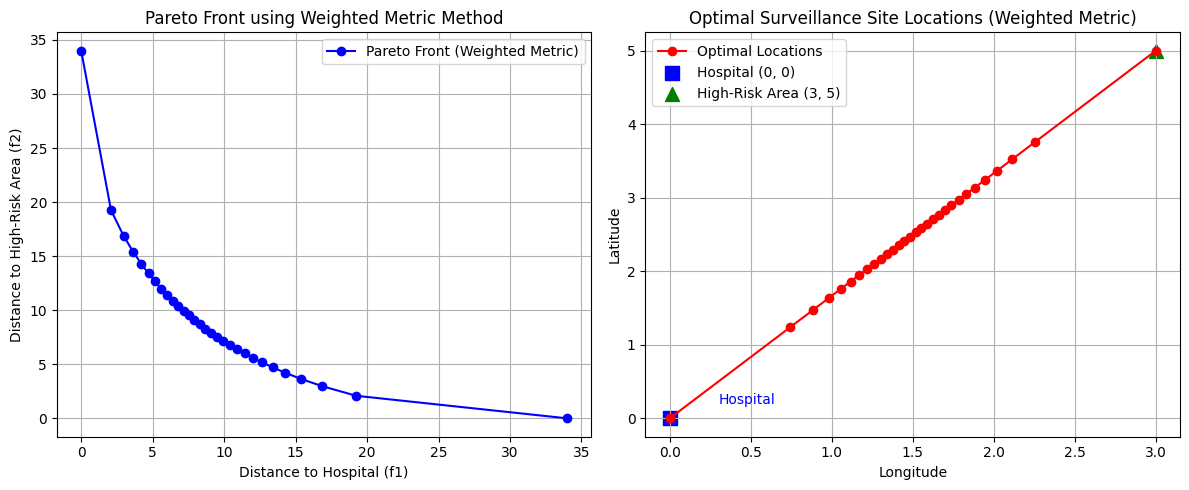

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Objective 1: Distance to hospital (0,0)
def f1(x):
    return (x[0] - 0)**2 + (x[1] - 0)**2

# Objective 2: Distance to high-risk area (3,5)
def f2(x):
    return (x[0] - 3)**2 + (x[1] - 5)**2

# Compute ideal points (min possible values for each objective)
ideal_f1 = f1([0, 0])   # Best location for f1
ideal_f2 = f2([3, 5])   # Best location for f2

# Weighted metric objective (Euclidean distance in objective space)
def weighted_metric(x, w1, p=2):
    w2 = 1 - w1
    dist = (w1 * abs(f1(x) - ideal_f1)**p + w2 * abs(f2(x) - ideal_f2)**p)**(1/p)
    return dist

# Optimization setup
x0 = [0, 0]
bounds = [(-10, 10), (-10, 10)]
weights = np.linspace(0, 1, 30)

solutions = []
objectives = []

# Minimize weighted metric for different weights
for w1 in weights:
    res = minimize(weighted_metric, x0, args=(w1,), bounds=bounds)
    if res.success:
        x_opt = res.x
        solutions.append(x_opt)
        objectives.append([f1(x_opt), f2(x_opt)])

objectives = np.array(objectives)
solutions = np.array(solutions)

# Plotting
plt.figure(figsize=(12, 5))

# Pareto Front
plt.subplot(1, 2, 1)
plt.plot(objectives[:, 0], objectives[:, 1], 'bo-', label='Pareto Front (Weighted Metric)')
plt.xlabel('Distance to Hospital (f1)')
plt.ylabel('Distance to High-Risk Area (f2)')
plt.title('Pareto Front using Weighted Metric Method')
plt.grid(True)
plt.legend()

# Map View
plt.subplot(1, 2, 2)
plt.plot(solutions[:, 0], solutions[:, 1], 'ro-', label='Optimal Locations')
plt.scatter(0, 0, c='blue', marker='s', s=100, label='Hospital (0, 0)')
plt.scatter(3, 5, c='green', marker='^', s=100, label='High-Risk Area (3, 5)')
plt.annotate("Hospital", (0.3, 0.2), color='blue')
plt.annotate("High-Risk Area", (3.3, 5.2), color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Surveillance Site Locations (Weighted Metric)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
